### Assignment 1 - knn  
a) Make a KNN (starting with k = 5) and its training / validation / evaluation code to perform multiclass classification over all digits 
b) what are the hyperparameters you can tune? 
c) try at least two other options for each hyperparameter. Report the performance for each option 
d) you can try more options if you want. What is the final test accuracy? 

submission should include a code (both link to colab and .py format) and a report that has answers to the questions and results. 

hyperparameter is a parameter whose value is used to control the learning process 

##### Import Dataset 

In [ ]:
import numpy as np 
import torch 
from torchvision import datasets 

trainset = datasets.MNIST(root='./data', train = True, download = True)
testset = datasets.MNIST(root='./data', train = False, download = True)

##### Split & Prepare Dataset 

In [ ]:
# data split 
# indices for train / val splits: train_idx, valid_idx 
import numpy as np 
import torch

# split into train and validation sets 
np.random.seed(0) 
val_ratio = 0.1 
train_size = len(trainset) 
indices = list(range(train_size)) 
split_idx = int(np.floor(val_ratio * train_size))
np.random.shuffle(indices)
train_idx, val_idx = indices[split_idx:], indices[:split_idx] 

train_data = trainset.data[train_idx].float() / 255 
train_labels = trainset.targets[train_idx] 
val_data = trainset.data[val_idx].float() / 255 
val_labels = trainset.targets[val_idx] 

In [ ]:
# use gpu for train and val data sets 
train_data = train_data.cuda() 
val_data = val_data.cuda() 
train_labels = train_labels.cuda() 
val_labels = val_labels.cuda() 

In [ ]:
train_data.device

device(type='cuda', index=0)

In [ ]:
print(train_data.shape, train_labels.shape) 
print(val_data.shape, val_labels.shape) 

torch.Size([54000, 784]) torch.Size([54000])
torch.Size([6000, 784]) torch.Size([6000])


In [ ]:
# reshape data 
train_data = train_data.view(train_data.size(0), -1)
val_data = val_data.view(val_data.size(0), -1)

torch.Size([54000, 784])
torch.Size([6000, 784])


##### KNN Algorithm 

In [ ]:
def knn(train_data, train_labels, test_data, k, p, compute_mode):
  test_labels = []
  for test_index in range(test_data.shape[0]):
    unsqueezedData = torch.unsqueeze(test_data[test_index], 0) 
    euclideanDistance = torch.cdist(unsqueezedData, train_data, p = float(p), compute_mode=compute_mode) **2 
    val, idx = torch.topk(euclideanDistance, k, largest = False)
    singleTestLabels = train_labels[idx] 
    predictedVal, predictedidx = torch.mode(singleTestLabels[0])
    test_labels.append(predictedVal.item())
  torch.tensor(test_labels)
  return test_labels

In [ ]:
predicted_val_labels = knn(train_data, train_labels, val_data, 5, 2, 'use_mm_for_euclid_dist_if_necessary')

##### Evaluation 

In [ ]:
def accuracy(predicted_labels, true_labels): 
  correct = 0 
  for idx in range(len(predicted_labels)): 
    if predicted_labels[idx] == true_labels[idx]: 
      correct += 1 
  accuracy = correct / len(true_labels) * 100 
  error = 100 - accuracy 
  return accuracy, error 

In [ ]:
print(accuracy(predicted_val_labels, val_labels))

(92.73333333333333, 7.266666666666666)


##### Vary K 

In [ ]:
# driver code to generate results for diff values of k 
kValues = [5, 10, 20, 50, 100, 150, 200]
accuracyList = [] 
errorList = [] 
p = 2 
compute_mode = 'use_mm_for_euclid_dist_if_necessary'
for k in kValues: 
  predicted_val_labels = knn(train_data, train_labels, val_data, k, p, compute_mode)
  accuracyVal, errorVal = accuracy(predicted_val_labels, val_labels)
  accuracyList.append(accuracyVal) 
  errorList.append(errorVal) 

5
97.36666666666667 2.6333333333333258
10
97.16666666666667 2.8333333333333286
20
96.51666666666667 3.4833333333333343
50
95.5 4.5
100
94.23333333333333 5.766666666666666
150
93.60000000000001 6.3999999999999915
200
92.73333333333333 7.266666666666666
accuracy: [97.36666666666667, 97.16666666666667, 96.51666666666667, 95.5, 94.23333333333333, 93.60000000000001, 92.73333333333333]
error: [2.6333333333333258, 2.8333333333333286, 3.4833333333333343, 4.5, 5.766666666666666, 6.3999999999999915, 7.266666666666666]


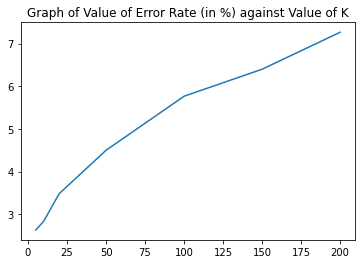

In [ ]:
import matplotlib.pyplot as plt 
x_axis = kValues 
y_error_axis = errorList 
y_accuracy_axis = accuracyList
plt.plot(x_axis, y_error_axis, label='Error Rate', linestyle = '-') 
plt.title('Graph of Value of Error Rate (in %) against Value of K')
plt.show() 

##### Vary P 

In [ ]:
# driver code to generate results for diff values of p
pValues = [i for i in range(1, 11)]
p_accuracyList = []
p_errorList = [] 
k = 5 
compute_mode = 'use_mm_for_euclid_dist_if_necessary'
for p in pValues:
  p_predicted_val_labels = knn(train_data, train_labels, val_data, k, p, compute_mode)
  p_accuracyVal, p_errorVal = accuracy(p_predicted_val_labels, val_labels)
  p_accuracyList.append(p_accuracyVal) 
  p_errorList.append(p_errorVal) 

1
96.55 3.450000000000003
2
97.36666666666667 2.6333333333333258
3
97.71666666666667 2.2833333333333314
4
97.8 2.200000000000003
5
97.89999999999999 2.1000000000000085
6
97.81666666666666 2.183333333333337
7
97.83333333333334 2.166666666666657
8
97.89999999999999 2.1000000000000085
9
97.93333333333332 2.066666666666677
10
98.0 2.0
accuracy: [96.55, 97.36666666666667, 97.71666666666667, 97.8, 97.89999999999999, 97.81666666666666, 97.83333333333334, 97.89999999999999, 97.93333333333332, 98.0]
error: [3.450000000000003, 2.6333333333333258, 2.2833333333333314, 2.200000000000003, 2.1000000000000085, 2.183333333333337, 2.166666666666657, 2.1000000000000085, 2.066666666666677, 2.0]


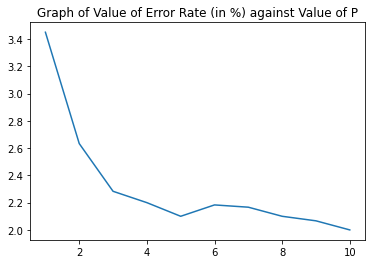

In [ ]:
import matplotlib.pyplot as plt 
x_axis = pValues 
y_p_error_axis = p_errorList 
y_p_accuracy_axis = p_accuracyList
plt.plot(x_axis, y_p_error_axis, label='Error Rate', linestyle = '-') 
plt.title('Graph of Value of Error Rate (in %) against Value of P')
plt.show() 

#### Testing on the Test Set 
##### Using Optimised Values K = 5, P = 10

In [ ]:
# prepare test data set 
test_data = testset.data.float() / 255 
test_labels = testset.targets
test_data = test_data.cuda() 
test_labels = test_labels.cuda() 
print(test_data.shape, test_labels.shape) 

# reshape data 
test_data = test_data.view(test_data.size(0), -1)
print(test_data.shape)

torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([10000, 784])


In [ ]:
# run test data through knn algorithm 
k = 5 
p = 10 
compute_mode = 'use_mm_for_euclid_dist_if_necessary'
predicted_test_labels = knn(train_data, train_labels, test_data, k, p, compute_mode)
test_accuracyVal, test_errorVal = accuracy(predicted_test_labels, test_labels)

In [ ]:
print('accuracy: {}\nerror: {}'.format(test_accuracyVal, test_errorVal)) 

accuracy: 97.36
error: 2.6400000000000006
